[View in Colaboratory](https://colab.research.google.com/github/ChaitraliL/Artificial-Intelligence/blob/master/decisiontree.ipynb)

In [0]:
#from google.colab import files

#uploaded = files.upload()

In [114]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "201805-capitalbikeshare-tripdata.csv" with length 49429676 bytes


In [133]:
print('Attributes used : Duration,Start station number,End station number,Bike number,Member type\nBike number converted to categorical and then encoded due to error in converting string values to float by decision model')

Attributes used : Duration,Start station number,End station number,Bike number,Member type
Bike number converted to categorical and then encoded due to error in converting string values to float by decision model


In [0]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['201805-capitalbikeshare-tripdata.csv'].decode('utf-8')))

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374115 entries, 0 to 374114
Data columns (total 9 columns):
Duration                374115 non-null int64
Start date              374115 non-null object
End date                374115 non-null object
Start station number    374115 non-null int64
Start station           374115 non-null object
End station number      374115 non-null int64
End station             374115 non-null object
Bike number             374115 non-null object
Member type             374115 non-null object
dtypes: int64(3), object(6)
memory usage: 25.7+ MB


In [117]:
df['Bike number'] = df['Bike number'].astype('category')
df.info()
df['Bike number'].nunique()
df['Bike number'] = df['Bike number'].cat.codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374115 entries, 0 to 374114
Data columns (total 9 columns):
Duration                374115 non-null int64
Start date              374115 non-null object
End date                374115 non-null object
Start station number    374115 non-null int64
Start station           374115 non-null object
End station number      374115 non-null int64
End station             374115 non-null object
Bike number             374115 non-null category
Member type             374115 non-null object
dtypes: category(1), int64(3), object(5)
memory usage: 23.7+ MB


In [118]:
print(df['Start station number'].nunique())
print(df['Start station'].nunique())
#print(df.groupby(['Start station number','Start station']).size())
print('Start station number and Start station are same hence discard start station')

501
501
Start station number and Start station are same hence discard start station


In [119]:
print(df['End station number'].nunique())
print(df['End station'].nunique())
#print(df.groupby(['End station number','End station']).size())
print('End station number and End station are same hence discard end station')

501
501
End station number and End station are same hence discard end station


In [120]:
df['Duration'].describe()

count    374115.000000
mean       1261.837144
std        2423.195856
min          60.000000
25%         441.000000
50%         769.000000
75%        1322.000000
max       86181.000000
Name: Duration, dtype: float64

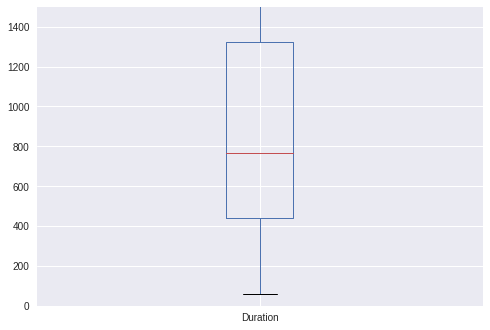

In [121]:
import matplotlib.pyplot as plt
boxplot = df.boxplot(column = ['Duration'])
boxplot.set_ylim(0, 1500)
plt.show()

In [122]:
df = df[['Duration','Start station number','End station number','Bike number','Member type']]
df['Member type'] = df['Member type'].map({'Casual': 0, 'Member': 1})
df.head()

,Duration,Start station number,End station number,Bike number,Member type
0,679,31302,31307,3633,1
1,578,31232,31609,2376,0
2,580,31232,31609,1977,0
3,606,31104,31509,676,1
4,582,31129,31118,2819,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374115 entries, 0 to 374114
Data columns (total 5 columns):
Duration                374115 non-null int64
Start station number    374115 non-null int64
End station number      374115 non-null int64
Bike number             374115 non-null int16
Member type             374115 non-null int64
dtypes: int16(1), int64(4)
memory usage: 12.1 MB


In [0]:
X = df.drop('Member type', axis=1)
y = df['Member type']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [127]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7677939462626565

In [130]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted casual', 'Predicted member'],
    index=['True casual', 'True member']
)

,Predicted casual,Predicted member
True casual,15057,10506
True member,11212,56754


In [131]:
y_test.value_counts()

1    67966
0    25563
Name: Member type, dtype: int64